In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Spotify most streamed.csv')
print(df.isnull().sum())
df = df.dropna()


Artist and Title    0
Streams             0
Daily               3
dtype: int64


In [5]:
df['Streams'] = df['Streams'].str.replace(',', '').astype(int)
df['Daily'] = df['Daily'].str.replace(',', '').astype(int)
df

,Artist and Title,Streams,Daily
0,The Weeknd - Blinding Lights,3783983806,1736378
1,Ed Sheeran - Shape of You,3616649759,1135140
2,Lewis Capaldi - Someone You Loved,2958875491,1522093
3,Post Malone - Sunflower,2898311408,1871177
4,Tones And I - Dance Monkey,2896024418,666818
...,...,...,...
2495,Richard Marx - Right Here Waiting,399549516,250073
2496,The Neighbourhood - You Get Me So High,399218096,617797
2497,Clairo - Bubble Gum,398936748,370661
2498,Bing Crosby - White Christmas,398725594,1250615


In [7]:
df[['Artist', 'Title']] = df['Artist and Title'].str.split(' - ', n=1, expand=True)


/var/folders/jj/_83b2y215bv5_bt2j4m4jvl00000gp/T/ipykernel_76266/1010452295.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_30_tracks, y='Title', x='Streams', palette='viridis')


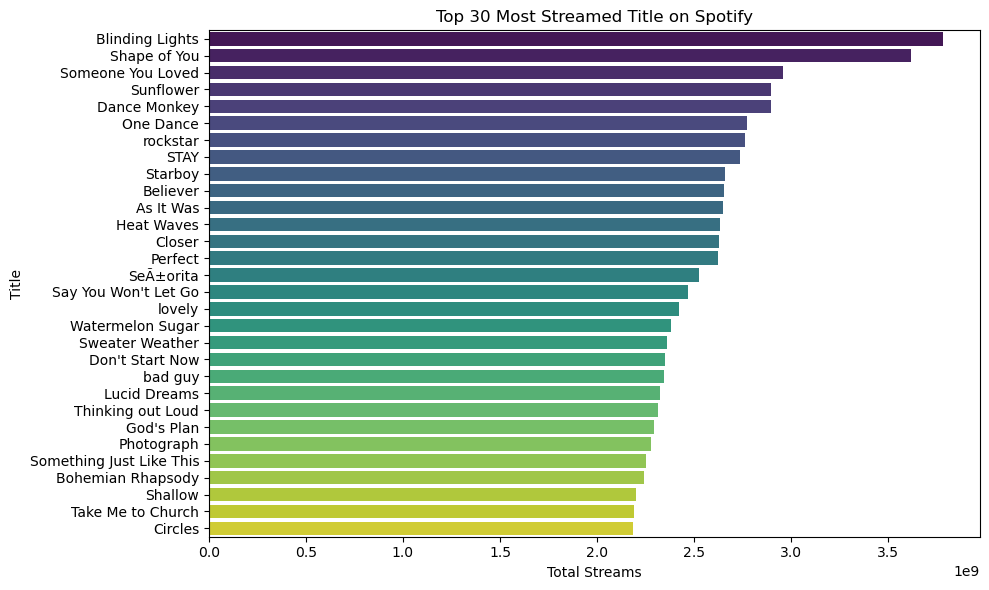

In [11]:
top_30_tracks = df.sort_values('Streams', ascending=False).head(30)

plt.figure(figsize=(10,6))
sns.barplot(data=top_30_tracks, y='Title', x='Streams', palette='viridis')
plt.title('Top 30 Most Streamed Title on Spotify')
plt.xlabel('Total Streams')
plt.ylabel('Title')
plt.tight_layout()
plt.show()


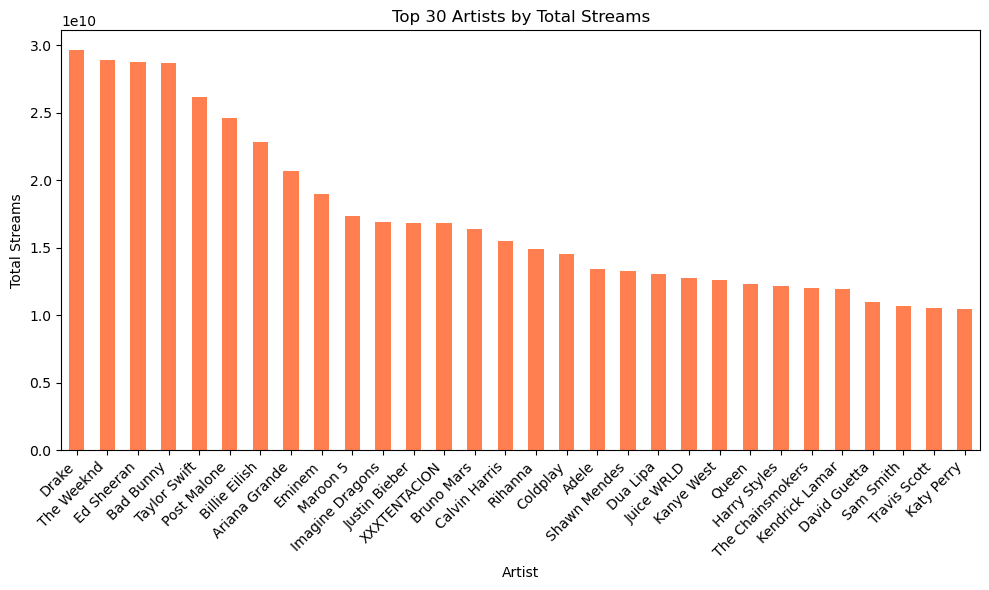

In [15]:
top_artist = df.groupby('Artist')['Streams'].sum().sort_values(ascending=False).head(30)
plt.figure(figsize=(10,6))
top_artist.plot(kind='bar', color='coral')
plt.title('Top 30 Artists by Total Streams')
plt.ylabel('Total Streams')
plt.xticks(rotation=45,ha = 'right')
plt.tight_layout()
plt.show()


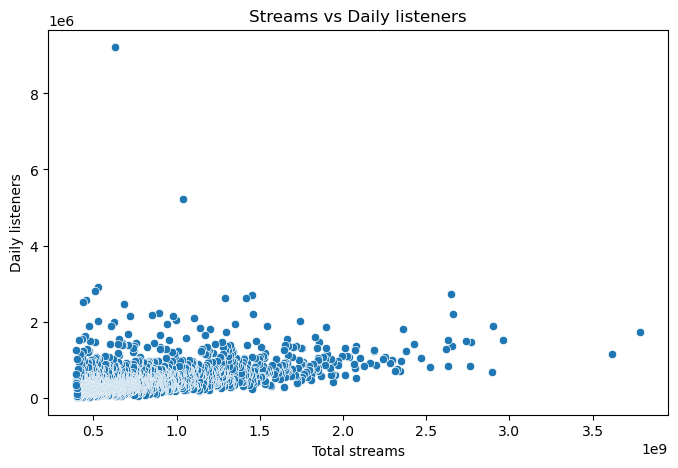

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Streams', y='Daily')
plt.title('Streams vs Daily listeners')
plt.xlabel('Total streams')
plt.ylabel('Daily listeners')
plt.show()
